In [112]:
import os
import h5py
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from numpy import genfromtxt    
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels

In [2]:
def FDR_sofie(p, q):
    # p : 1D np array, vector of p-values
    # q : float, false discovery rate level
    p = np.sort(p)
    V = len(p)
    I = np.arange(1,V+1)

    cVID = 1
    cVN  = (1 / np.arange(1,V+1)).sum()

    pID  = p[np.max(np.where(p <= (I / V*q / cVID)))]
    pN   = np.where(p <= (I / V*q / cVN))
    
    return pID, pN

# load solar results

In [13]:
tot_node_num = 360
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append(i)
print(len(node_str))

node_str[0], '...', node_str[-1]

360


(1, '...', 360)

## cortex LSUB heritability

In [100]:
fname = '/data/p_02323/hippocampus/solar/cortex_LSUB/CLSUB_results_herit.txt'

data = pd.read_csv(fname,
                   index_col = 0,
                   header = 0)

data.index.name = 'node'

In [101]:
df_data_herit = pd.DataFrame(index = node_str,
                             columns = ['H2r', 'rp'])

In [102]:
for nodeID in range(1, tot_node_num + 1):

    iA = data.index.get_loc(nodeID)
    iB = df_data_herit.index.get_loc(nodeID)

    df_data_herit.iloc[iB]['H2r'] = data.iloc[iA]['H2r']
    df_data_herit.iloc[iB]['rp']  = data.iloc[iA]['rp']

In [103]:
df_data_herit['H2r'].max()

0.49572879999999997

In [104]:
# FDR correction on p-values
H =  np.array(df_data_herit['H2r'], dtype = 'float')
p = np.array(df_data_herit['rp'], dtype = 'float')
q = 0.05
pID, pN = FDR_sofie(p, q)
pID, len(np.where(p <= pID)[0])


(0.0445605, 340)

In [105]:
# load surfaces
surf_lh, surf_rh = load_conte69()

# load labeling file
labeling_file = '../data/tout_group/glasser.csv' 
labeling = genfromtxt(labeling_file)

mask = labeling != 0 # this takes the mask of the left hem only..

mymask = np.ones((64984,)).astype('bool')
mymask[np.where(mask == False)[0]] = False
mymask[np.where(mask == False)[0] + 32492] = False

H_labeled = map_to_labels(H, labeling, mask=mymask) 
H_labeled[np.where(mymask == False)] = np.nan

p_labeled = map_to_labels(p, labeling, mask=mymask) 
p_labeled[np.where(mymask == False)] = np.nan


H_labeled.shape, p_labeled.shape

((64984,), (64984,))

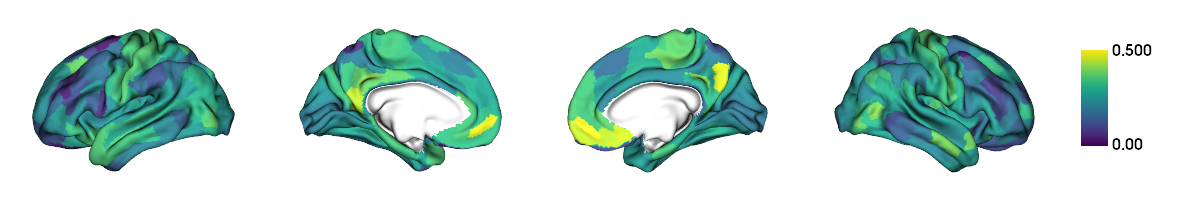

In [106]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = H_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis', 
                 color_bar = True,
                 color_range = (0, 0.5),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_LSUB.png'
                 )

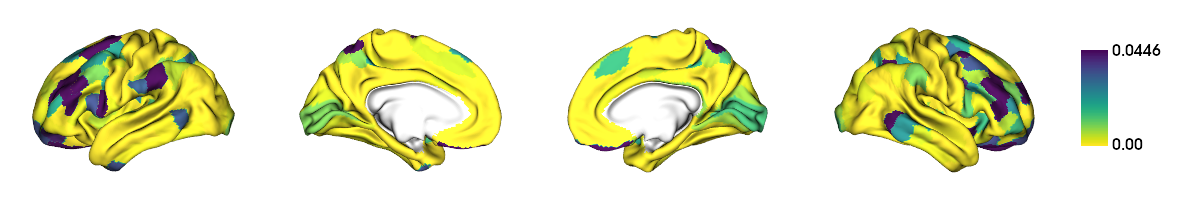

In [107]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = p_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis_r', 
                 color_bar = True,
                 color_range = (0, pID),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_LSUB_pFDR.png'
                 )

In [108]:
fname = '../data/tout_group/cortex709_LSUB.h5'
with h5py.File(fname, "r") as f:        
    cortexFC = np.array(f['LSUB'])   
cortexFC.flatten().shape, H.shape

((360,), (360,))

In [114]:
cortexFC.max(), H.max()

(0.6549741839919333, 0.49572879999999997)

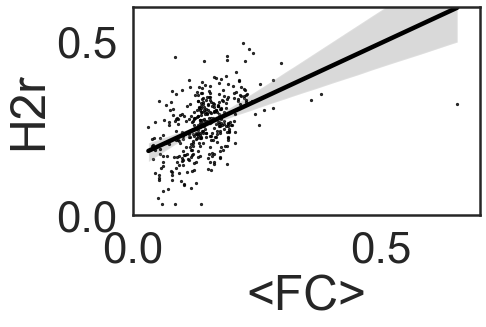

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=2)
sns.set_style('white')
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(cortexFC,
                  H,
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='H2r') 
ax.set(xlim=(0, 0.7))
ax.set(ylim=(0, 0.6))
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/cortex_heri_corrFC_LSUB.png")


In [138]:

a = cortexFC
b = H.reshape(360,1)

spearmanr(a.flatten(),b.flatten())


SpearmanrResult(correlation=0.49936795418740176, pvalue=4.2084823898915076e-24)

# cortex LCA

In [139]:
fname = '/data/p_02323/hippocampus/solar/cortex_LCA/CLCA_results_herit.txt'

data = pd.read_csv(fname,
                   index_col = 0,
                   header = 0)

data.index.name = 'node'

In [140]:
df_data_herit = pd.DataFrame(index = node_str,
                             columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num + 1):

    iA = data.index.get_loc(nodeID)
    iB = df_data_herit.index.get_loc(nodeID)

    df_data_herit.iloc[iB]['H2r'] = data.iloc[iA]['H2r']
    df_data_herit.iloc[iB]['rp']  = data.iloc[iA]['rp']

In [141]:
df_data_herit['H2r'].max()

0.5246314000000001

In [142]:
# FDR correction on p-values
H =  np.array(df_data_herit['H2r'], dtype = 'float')
p = np.array(df_data_herit['rp'], dtype = 'float')
q = 0.05
pID, pN = FDR_sofie(p, q)
pID, len(np.where(p <= pID)[0])


(0.0446693, 351)

In [143]:
# load surfaces
surf_lh, surf_rh = load_conte69()

# load labeling file
labeling_file = '../data/tout_group/glasser.csv' 
labeling = genfromtxt(labeling_file)

mask = labeling != 0 # this takes the mask of the left hem only..

mymask = np.ones((64984,)).astype('bool')
mymask[np.where(mask == False)[0]] = False
mymask[np.where(mask == False)[0] + 32492] = False

H_labeled = map_to_labels(H, labeling, mask=mymask) 
H_labeled[np.where(mymask == False)] = np.nan

p_labeled = map_to_labels(p, labeling, mask=mymask) 
p_labeled[np.where(mymask == False)] = np.nan


H_labeled.shape, p_labeled.shape

((64984,), (64984,))

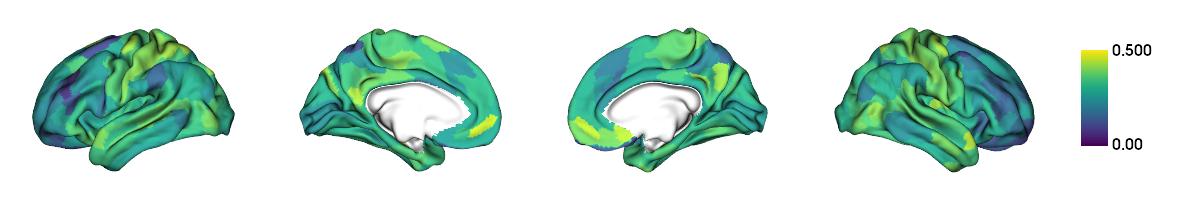

In [144]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = H_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis', 
                 color_bar = True,
                 color_range = (0, 0.5),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_LCA.png'
                 )

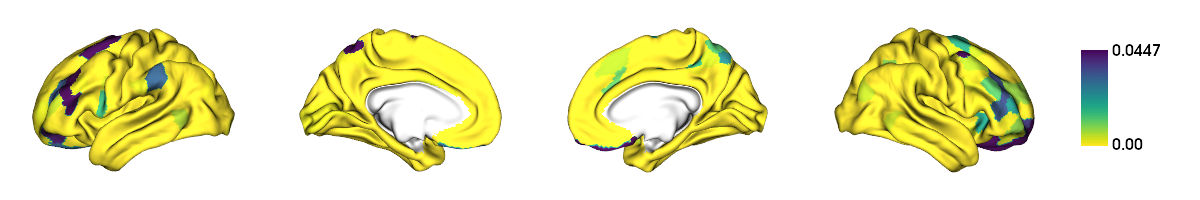

In [145]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = p_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis_r', 
                 color_bar = True,
                 color_range = (0, pID),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_LCA_pFDR.png'
                 )

In [146]:
fname = '../data/tout_group/cortex709_LCA.h5'
with h5py.File(fname, "r") as f:        
    cortexFC = np.array(f['LCA'])   
cortexFC.flatten().shape, H.shape

((360,), (360,))

In [147]:
cortexFC.max(), H.max()

(0.6246573971622456, 0.5246314000000001)

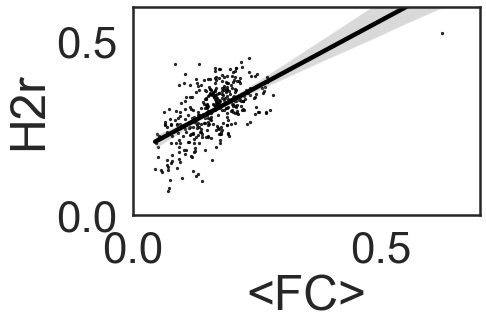

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=2)
sns.set_style('white')
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(cortexFC,
                  H,
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='H2r') 
ax.set(xlim=(0, 0.7))
ax.set(ylim=(0, 0.6))
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/cortex_heri_corrFC_LCA.png")


In [148]:

a = cortexFC
b = H.reshape(360,1)

spearmanr(a.flatten(),b.flatten())


SpearmanrResult(correlation=0.5551292834049645, pvalue=1.7285845633122815e-30)

# cortex LDG

In [149]:
fname = '/data/p_02323/hippocampus/solar/cortex_LDG/CLDG_results_herit.txt'

data = pd.read_csv(fname,
                   index_col = 0,
                   header = 0)

data.index.name = 'node'

In [150]:
df_data_herit = pd.DataFrame(index = node_str,
                             columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num + 1):

    iA = data.index.get_loc(nodeID)
    iB = df_data_herit.index.get_loc(nodeID)

    df_data_herit.iloc[iB]['H2r'] = data.iloc[iA]['H2r']
    df_data_herit.iloc[iB]['rp']  = data.iloc[iA]['rp']

In [151]:
df_data_herit['H2r'].max()

0.5007803

In [152]:
# FDR correction on p-values
H =  np.array(df_data_herit['H2r'], dtype = 'float')
p = np.array(df_data_herit['rp'], dtype = 'float')
q = 0.05
pID, pN = FDR_sofie(p, q)
pID, len(np.where(p <= pID)[0])


(0.045503800000000004, 358)

In [153]:
H_labeled = map_to_labels(H, labeling, mask=mymask) 
H_labeled[np.where(mymask == False)] = np.nan

p_labeled = map_to_labels(p, labeling, mask=mymask) 
p_labeled[np.where(mymask == False)] = np.nan


H_labeled.shape, p_labeled.shape

((64984,), (64984,))

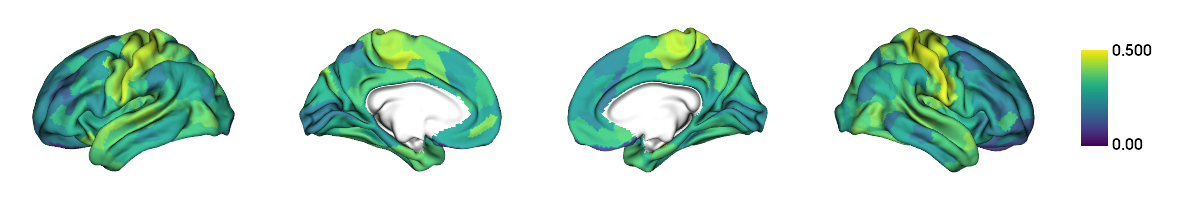

In [154]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = H_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis', 
                 color_bar = True,
                 color_range = (0, 0.5),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_LDG.png'
                 )

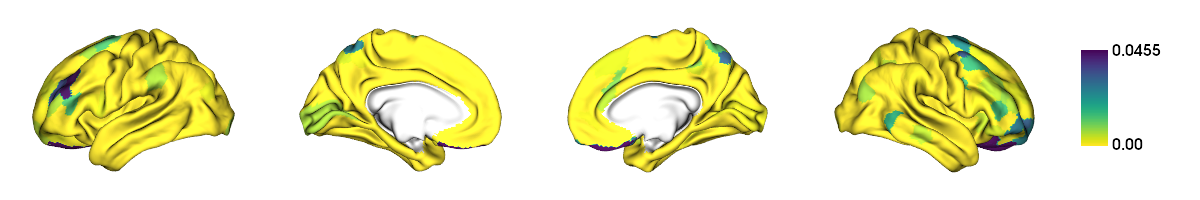

In [155]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = p_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis_r', 
                 color_bar = True,
                 color_range = (0, pID),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_LDG_pFDR.png'
                 )

In [156]:
fname = '../data/tout_group/cortex709_LDG.h5'
with h5py.File(fname, "r") as f:        
    cortexFC = np.array(f['LDG'])   
cortexFC.flatten().shape, H.shape

((360,), (360,))

In [157]:
cortexFC.max(), H.max()

(0.5686846222518998, 0.5007803)

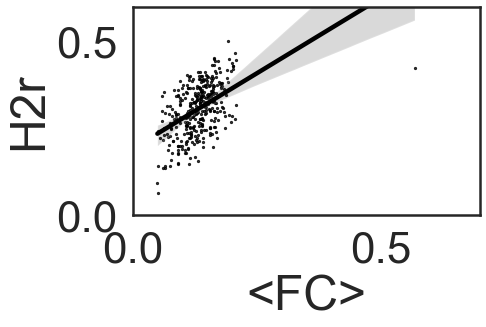

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=2)
sns.set_style('white')
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(cortexFC,
                  H,
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='H2r') 
ax.set(xlim=(0, 0.7))
ax.set(ylim=(0, 0.6))
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/cortex_heri_corrFC_LDG.png")


In [159]:

a = cortexFC
b = H.reshape(360,1)

spearmanr(a.flatten(),b.flatten())


SpearmanrResult(correlation=0.5018608682680165, pvalue=2.3071923815059885e-24)

# cortex RSUB

In [160]:
fname = '/data/p_02323/hippocampus/solar/cortex_RSUB/CRSUB_results_herit.txt'

data = pd.read_csv(fname,
                   index_col = 0,
                   header = 0)

data.index.name = 'node'

In [161]:
df_data_herit = pd.DataFrame(index = node_str,
                             columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num + 1):

    iA = data.index.get_loc(nodeID)
    iB = df_data_herit.index.get_loc(nodeID)

    df_data_herit.iloc[iB]['H2r'] = data.iloc[iA]['H2r']
    df_data_herit.iloc[iB]['rp']  = data.iloc[iA]['rp']

In [162]:
df_data_herit['H2r'].max()

0.5277384

In [163]:
# FDR correction on p-values
H =  np.array(df_data_herit['H2r'], dtype = 'float')
p = np.array(df_data_herit['rp'], dtype = 'float')
q = 0.05
pID, pN = FDR_sofie(p, q)
pID, len(np.where(p <= pID)[0])


(0.0454037, 356)

In [164]:
H_labeled = map_to_labels(H, labeling, mask=mymask) 
H_labeled[np.where(mymask == False)] = np.nan

p_labeled = map_to_labels(p, labeling, mask=mymask) 
p_labeled[np.where(mymask == False)] = np.nan

H_labeled.shape, p_labeled.shape

((64984,), (64984,))

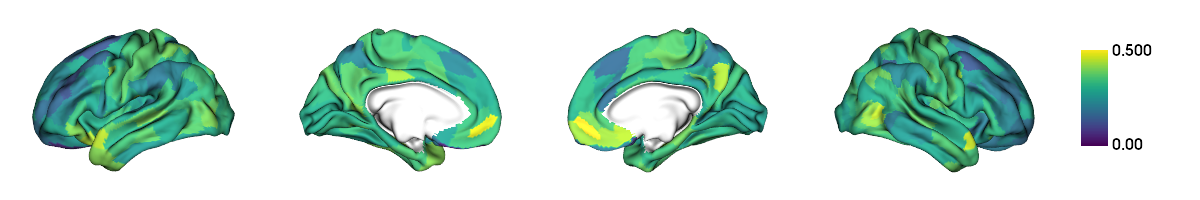

In [165]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = H_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis', 
                 color_bar = True,
                 color_range = (0, 0.5),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_RSUB.png'
                 )

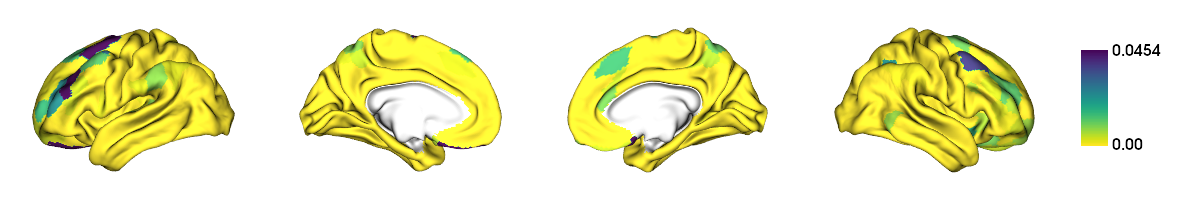

In [166]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = p_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis_r', 
                 color_bar = True,
                 color_range = (0, pID),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_RSUB_pFDR.png'
                 )

In [167]:
fname = '../data/tout_group/cortex709_RSUB.h5'
with h5py.File(fname, "r") as f:        
    cortexFC = np.array(f['RSUB'])   
cortexFC.flatten().shape, H.shape

((360,), (360,))

In [168]:
cortexFC.max(), H.max()

(0.7149662218682455, 0.5277384)

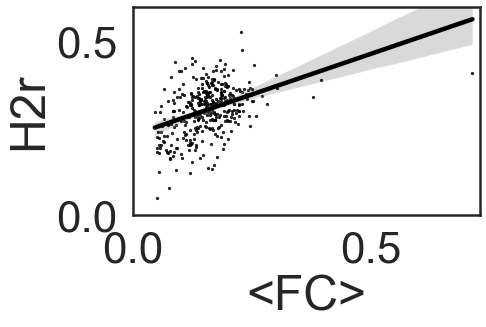

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=2)
sns.set_style('white')
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(cortexFC,
                  H,
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='H2r') 
ax.set(xlim=(0, 0.73))
ax.set(ylim=(0, 0.6))
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/cortex_heri_corrFC_RSUB.png")


In [170]:
a = cortexFC
b = H.reshape(360,1)

spearmanr(a.flatten(),b.flatten())


SpearmanrResult(correlation=0.3926740689871578, pvalue=1.0135481403182785e-14)

# cortex RCA

In [171]:
fname = '/data/p_02323/hippocampus/solar/cortex_RCA/CRCA_results_herit.txt'

data = pd.read_csv(fname,
                   index_col = 0,
                   header = 0)

data.index.name = 'node'

In [172]:
df_data_herit = pd.DataFrame(index = node_str,
                             columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num + 1):

    iA = data.index.get_loc(nodeID)
    iB = df_data_herit.index.get_loc(nodeID)

    df_data_herit.iloc[iB]['H2r'] = data.iloc[iA]['H2r']
    df_data_herit.iloc[iB]['rp']  = data.iloc[iA]['rp']

In [173]:
df_data_herit['H2r'].max()

0.4734144

In [174]:
# FDR correction on p-values
H =  np.array(df_data_herit['H2r'], dtype = 'float')
p = np.array(df_data_herit['rp'], dtype = 'float')
q = 0.05
pID, pN = FDR_sofie(p, q)
pID, len(np.where(p <= pID)[0])


(0.0434445, 356)

In [175]:
H_labeled = map_to_labels(H, labeling, mask=mymask) 
H_labeled[np.where(mymask == False)] = np.nan

p_labeled = map_to_labels(p, labeling, mask=mymask) 
p_labeled[np.where(mymask == False)] = np.nan

H_labeled.shape, p_labeled.shape

((64984,), (64984,))

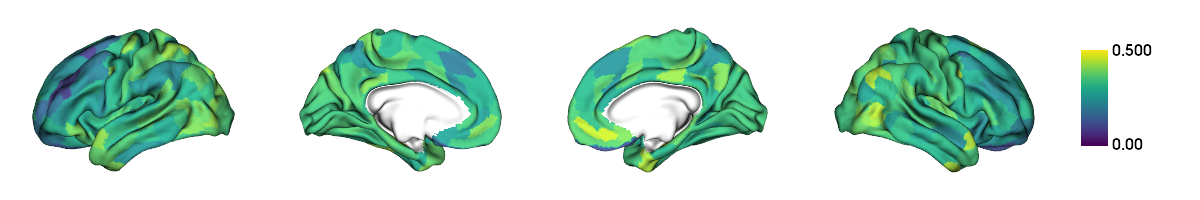

In [176]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = H_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis', 
                 color_bar = True,
                 color_range = (0, 0.5),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_RCA.png'
                 )

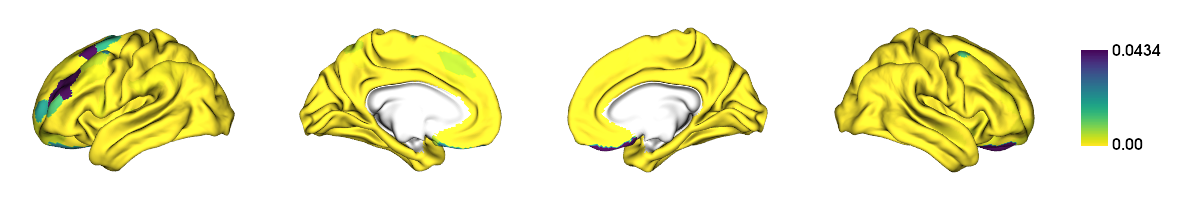

In [177]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = p_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis_r', 
                 color_bar = True,
                 color_range = (0, pID),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_RCA_pFDR.png'
                 )

In [178]:
fname = '../data/tout_group/cortex709_RCA.h5'
with h5py.File(fname, "r") as f:        
    cortexFC = np.array(f['RCA'])   
cortexFC.flatten().shape, H.shape

((360,), (360,))

In [179]:
cortexFC.max(), H.max()

(0.5270377624863662, 0.4734144)

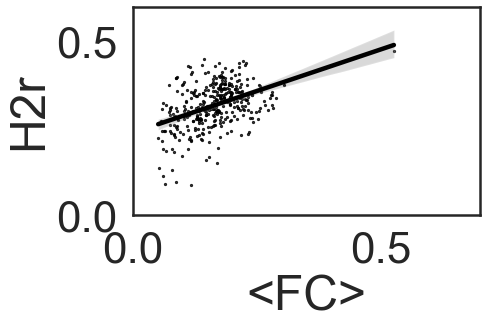

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=2)
sns.set_style('white')
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(cortexFC,
                  H,
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='H2r') 
ax.set(xlim=(0, 0.7))
ax.set(ylim=(0, 0.6))
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/cortex_heri_corrFC_RCA.png")


In [181]:
a = cortexFC
b = H.reshape(360,1)

spearmanr(a.flatten(),b.flatten())


SpearmanrResult(correlation=0.39254983963353623, pvalue=1.0350047887507284e-14)

# cortex RDG

In [182]:
fname = '/data/p_02323/hippocampus/solar/cortex_RDG/CRDG_results_herit.txt'

data = pd.read_csv(fname,
                   index_col = 0,
                   header = 0)

data.index.name = 'node'

In [183]:
df_data_herit = pd.DataFrame(index = node_str,
                             columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num + 1):

    iA = data.index.get_loc(nodeID)
    iB = df_data_herit.index.get_loc(nodeID)

    df_data_herit.iloc[iB]['H2r'] = data.iloc[iA]['H2r']
    df_data_herit.iloc[iB]['rp']  = data.iloc[iA]['rp']

In [184]:
df_data_herit['H2r'].max()

0.5257761

In [185]:
# FDR correction on p-values
H =  np.array(df_data_herit['H2r'], dtype = 'float')
p = np.array(df_data_herit['rp'], dtype = 'float')
q = 0.05
pID, pN = FDR_sofie(p, q)
pID, len(np.where(p <= pID)[0])


(0.041032400000000004, 354)

In [186]:
H_labeled = map_to_labels(H, labeling, mask=mymask) 
H_labeled[np.where(mymask == False)] = np.nan

p_labeled = map_to_labels(p, labeling, mask=mymask) 
p_labeled[np.where(mymask == False)] = np.nan

H_labeled.shape, p_labeled.shape

((64984,), (64984,))

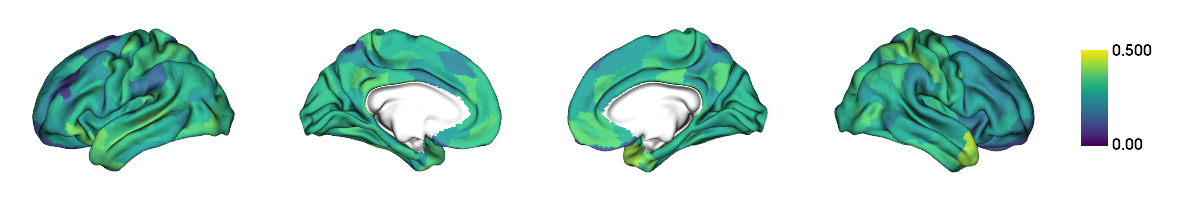

In [187]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = H_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis', 
                 color_bar = True,
                 color_range = (0, 0.5),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_RDG.png'
                 )

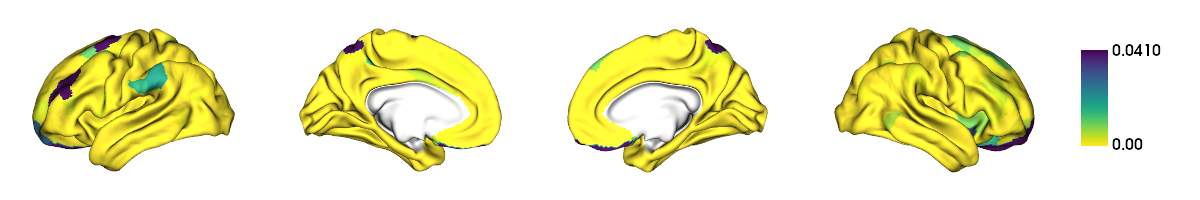

In [188]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = p_labeled,
                 nan_color = (0.9,0.9,0.9,1),
                 size = (1200, 200),
                 cmap = 'viridis_r', 
                 color_bar = True,
                 color_range = (0, pID),
                 interactive = False,
                 zoom = 1.3,
                 embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/cortex_herit_RDG_pFDR.png'
                 )

In [189]:
fname = '../data/tout_group/cortex709_RDG.h5'
with h5py.File(fname, "r") as f:        
    cortexFC = np.array(f['RDG'])   
cortexFC.flatten().shape, H.shape

((360,), (360,))

In [190]:
cortexFC.max(), H.max()

(0.5455035975433308, 0.5257761)

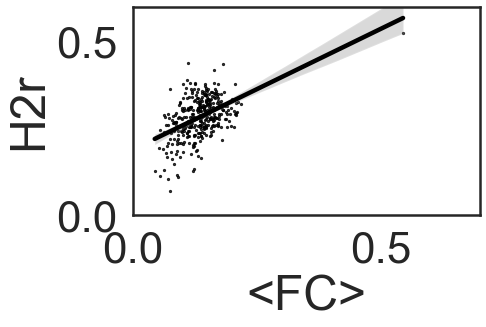

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=2)
sns.set_style('white')
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(cortexFC,
                  H,
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='H2r') 
ax.set(xlim=(0, 0.7))
ax.set(ylim=(0, 0.6))
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/cortex_heri_corrFC_RDG.png")


In [192]:
a = cortexFC
b = H.reshape(360,1)

spearmanr(a.flatten(),b.flatten())


SpearmanrResult(correlation=0.42270207846253954, pvalue=4.91224661995498e-17)